In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyfirmata
from time import sleep
import cv2

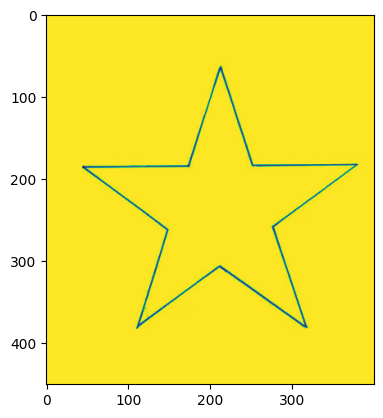

In [2]:
img = cv2.imread('assets/star.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
img  = img[:,300:700]
plt.imshow(img)


In [3]:

resize = cv2.resize(img, (20,30))
# plt.imshow(resize)
# resize
cv2.imshow('image',resize)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(resize[:,:,])
# canny = cv2.Canny(resize, 100, 100)
# np.where(resize == 255)

In [8]:
resize[np.argwhere( resize != 255)] = 0

In [13]:
np.savetxt('star.txt', resize, fmt='%d')

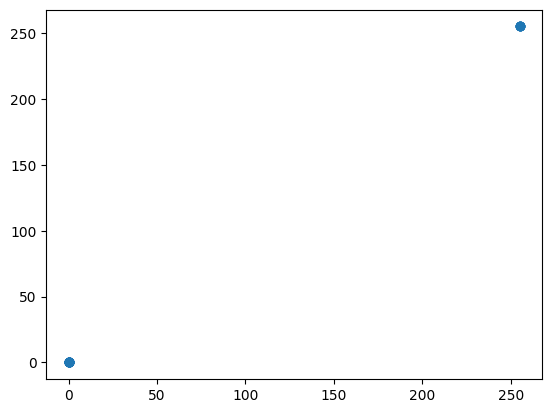

In [11]:
plt.scatter(resize[:,0], resize[:,1])

In [5]:

img = cv2.imread('assets/star.jpg', 0)
edges = cv2.Canny(img,100,100)  #If we decrease any threshold more detailed image

# Skip every n-th point along the edges
n = 10
reduced_edges2 = np.zeros_like(edges)
# reduced_edges2 = []
for row in range(edges.shape[0]):
    reduced_edges2[row, np.arange(0, edges.shape[1], n)] = edges[row, np.arange(0, edges.shape[1], n)]
    # reduced_edges2[row, np.arange(0, edges.shape[1], n)] = edges[row, np.arange(0, edges.shape[1], n)]


In [6]:
y = np.where(reduced_edges2 == 255)[1]
x = np.where(reduced_edges2 == 255)[0]

norm_y = np.where(reduced_edges2==255)[1] / reduced_edges2.shape[1]
norm_x = np.where(reduced_edges2==255)[0] / reduced_edges2.shape[0]

scaled_y = norm_y * 12 + 2
scaled_x = norm_x * 21 - 23

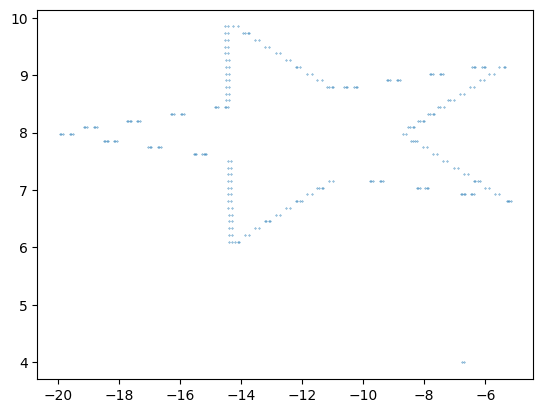

In [7]:
plt.scatter(scaled_x, scaled_y, s=0.1)

In [8]:
from numpy import *
def IK(x, y, a2=12, a4=10):
    # x -= 1.5
    # y -= 3
    r1 = sqrt(x**2+y**2)  # eqn 1
    phi_1 = arccos((a4**2-a2**2-r1**2)/(-2*a2*r1))   # eqn 2
    phi_2 = arctan2(y, x)  # eqn 3
    theta_1 = rad2deg(phi_2-phi_1)  # eqn 4 converted to degrees

    phi_3 = arccos((r1**2-a2**2-a4**2)/(-2*a2*a4))
    theta_2 = 180-rad2deg(phi_3)

    return theta_1, theta_2

In [9]:
thetas = []
for i in range(len(scaled_x)):
    theta_1, theta_2 = IK(scaled_x[i], scaled_y[i])
    if not np.isnan(theta_1) and not np.isnan(theta_2):
        thetas.append((theta_1, theta_2))

In [33]:
with open('thetas.txt', 'w') as f:
    for theta in thetas:
        f.write(f'{theta[0]},{theta[1]}\n')

## Set The pen

In [1]:
!ls /dev/ttyACM*

/dev/ttyACM0


In [2]:
import pyfirmata
from time import sleep

board = pyfirmata.Arduino('/dev/ttyACM0')

it = pyfirmata.util.Iterator(board)

# input('Press ENTER to start the servo motor, be careful!')

it.start()

# Define pins
pin0 = board.get_pin('d:10:s')
pin1 = board.get_pin('d:12:s')
pin3 = board.get_pin('d:7:s')

pin0.write(100)
sleep(3)
pin1.write(180-40)
sleep(3)
pin3.write(90)

In [3]:
pin3.write(80)
sleep(2)
pin0.write(90)
sleep(2)
pin1.write(180)

In [10]:

pin0.write(90)
sleep(1)
pin1.write(180-90)
sleep(1)
pin3.write(80)
sleep(2)
cnt = 0
for (theta1, theta2) in thetas:
    
    pin0.write(int(theta1))
    sleep(1)
    pin1.write(int(180-theta2))
    sleep(2)
    # pen down
    pin3.write(90)
    sleep(2)
    # pen up
    pin3.write(80)
    sleep(2)
    cnt += 1
    if cnt % 100 == 0:
        print(f'Finished {cnt} points')
#     # input('Press ENTER to continue')
sleep(1)
pin0.write(90)
sleep(1)
pin1.write(180-40)


Finished 100 points
Finished 200 points
